# Statistical Indocators from Anomaly Hotspot of Agricultural Production (ASAP)

ASAP is a platform used for early warning of  upcoming weather anomaly that leads to fluctuation of agricultural production.

- Genral link: https://mars.jrc.ec.europa.eu/asap/
- Download link: https://mars.jrc.ec.europa.eu/asap/download.php
- Senegal country assesment: https://mars.jrc.ec.europa.eu/asap/country.php?cntry=217
- GDrive data: https://drive.google.com/file/d/1JrPN5f_o5vTgIkLJLs0n04rjc49RsDPX/view?usp=sharing

In [1]:
# imports
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

plt.style.use('classic')
%matplotlib inline

Get data_path folder. Under subfolder region, we have statistics in gaul1 resolution.

In [2]:
data_folder = Path.cwd().parent.parent.joinpath('data', 'external', 'asap', 'region')

Get CSV files downloaded from ASAP website

In [3]:
files = Path(data_folder).glob('**/*')
files = [x for x in files]

print('Number of files: ', len(files))

Number of files:  26


In [50]:
files[0].name

'country_82_var_140_set_1_class_2_sensor_4.csv'

View csv files:

In [54]:
for f in files:
    df = pd.read_csv(f)
    print('File name: \n',
          f.name, '\n',
          df.head(2), '\n',
         '***********'*7, '\n')

File name: 
 country_82_var_140_set_1_class_2_sensor_4.csv 
    country_id country_name  region_id region_name  variable_id variable_name  \
0          82      Senegal        195       Kolda          140   Temperature   
1          82      Senegal        195       Kolda          140   Temperature   

   sensor_id sensor_name  class_id                      class_name      date  \
0          4       ECMWF         2  Rangeland during growing cycle  19890101   
1          4       ECMWF         2  Rangeland during growing cycle  19890111   

    value  
0  25.302  
1  26.047   
 ***************************************************************************** 

File name: 
 country_82_var_20_set_1_class_2_sensor_3.csv 
    country_id country_name  region_id region_name  variable_id  \
0          82      Senegal        195       Kolda           20   
1          82      Senegal        195       Kolda           20   

             variable_name  sensor_id sensor_name  class_id  \
0  NDVI Cumulated

Join all csv files into a single DataFrame

In [55]:
cols = list(df.columns)

df_asap = pd.DataFrame(columns = cols)

for f in files:
    df = pd.read_csv(f)
    df_asap = df_asap.append(df)

In [57]:
df_asap.head()

,country_id,country_name,region_id,region_name,variable_id,variable_name,sensor_id,sensor_name,class_id,class_name,date,value
0,82,Senegal,195,Kolda,140,Temperature,4,ECMWF,2,Rangeland during growing cycle,19890101,25.302
1,82,Senegal,195,Kolda,140,Temperature,4,ECMWF,2,Rangeland during growing cycle,19890111,26.047
2,82,Senegal,195,Kolda,140,Temperature,4,ECMWF,2,Rangeland during growing cycle,19890501,31.429
3,82,Senegal,195,Kolda,140,Temperature,4,ECMWF,2,Rangeland during growing cycle,19890511,32.047
4,82,Senegal,195,Kolda,140,Temperature,4,ECMWF,2,Rangeland during growing cycle,19890521,32.364


In [58]:
df_asap.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268860 entries, 0 to 14421
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   country_id     268860 non-null  object 
 1   country_name   268860 non-null  object 
 2   region_id      268860 non-null  object 
 3   region_name    268860 non-null  object 
 4   variable_id    268860 non-null  object 
 5   variable_name  268860 non-null  object 
 6   sensor_id      268860 non-null  object 
 7   sensor_name    268860 non-null  object 
 8   class_id       268860 non-null  object 
 9   class_name     268860 non-null  object 
 10  date           268860 non-null  object 
 11  value          268860 non-null  float64
dtypes: float64(1), object(11)
memory usage: 26.7+ MB


### Lets investigate what each column mean.

In [71]:
for c in cols:
    print(f'Column:            {c} \n\
has unique values: {df_asap[c].unique()} \n')

Column:            country_id 
has unique values: [82] 

Column:            country_name 
has unique values: ['Senegal'] 

Column:            region_id 
has unique values: [195 208 271 491 492 1104 1108 1109 1687 1688 2314 2315 2316 2317] 

Column:            region_name 
has unique values: ['Kolda' 'Fatick' 'Dakar' 'Kedougou' 'Tambacounda' 'Sedhiou' 'Kaffrine'
 'Kaolack' 'Thies' 'Ziguinchor' 'Diourbel' 'Saint louis' 'Louga' 'Matam'] 

Column:            variable_id 
has unique values: [140 20 40 160 70 2 10 170] 

Column:            variable_name 
has unique values: ['Temperature' 'NDVI Cumulated - zscore' 'SPI - 3 months'
 'Water Satisfaction Index (WSI)' 'NDVI - zscore' 'NDVI' 'Rainfall'] 

Column:            sensor_id 
has unique values: [4 3 5] 

Column:            sensor_name 
has unique values: ['ECMWF' 'MODIS' 'ECMWF-CHIRPS'] 

Column:            class_id 
has unique values: [2 1] 

Column:            class_name 
has unique values: ['Rangeland during growing cycle' 'Crop during

In [76]:
df_asap[df_asap['class_id'] == 1]['class_name'].unique()

array(['Crop during growing cycle', 'Crop'], dtype=object)

In [75]:
df_asap[df_asap['class_id'] == 2]['class_name'].unique()

array(['Rangeland during growing cycle', 'Rangeland'], dtype=object)

_class_id_ columns is 1 for Cropland, 2 for Rangeland
_class_name_ I'm not sure what it means yet.

Here is when we store values:

In [137]:
df_asap['year'] = df_asap['date'].apply(lambda x: int(str(x)[:4]))
df_asap['month'] = df_asap['date'].apply(lambda x: int(str(x)[4:6]))
df_asap['day'] = df_asap['date'].apply(lambda x: int(str(x)[6:]))

In [219]:
df_asap['yearday'] = df_asap['date'].apply(lambda x: datetime.strftime(datetime.strptime(str(x), '%Y%m%d'), '%j'))

In [220]:
df_asap['yearday'] = df_asap['yearday'].astype(int)

<AxesSubplot:xlabel='month', ylabel='Count'>

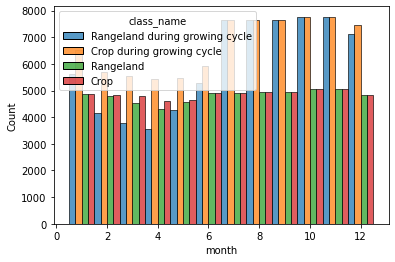

In [157]:
sns.histplot(df_asap[['year', 'month', 'class_name']], x = 'month', hue = 'class_name', discrete=True, multiple='dodge')

### Drop and save in single csv file

In [280]:
df_asap.columns

Index(['country_id', 'country_name', 'region_id', 'region_name', 'variable_id',
       'variable_name', 'sensor_id', 'sensor_name', 'class_id', 'class_name',
       'date', 'value', 'year', 'month', 'day', 'yearday'],
      dtype='object')

In [281]:
df_asap.head()

,country_id,country_name,region_id,region_name,variable_id,variable_name,sensor_id,sensor_name,class_id,class_name,date,value,year,month,day,yearday
0,82,Senegal,195,Kolda,140,Temperature,4,ECMWF,2,Rangeland during growing cycle,19890101,25.302,1989,1,1,1
1,82,Senegal,195,Kolda,140,Temperature,4,ECMWF,2,Rangeland during growing cycle,19890111,26.047,1989,1,11,11
2,82,Senegal,195,Kolda,140,Temperature,4,ECMWF,2,Rangeland during growing cycle,19890501,31.429,1989,5,1,121
3,82,Senegal,195,Kolda,140,Temperature,4,ECMWF,2,Rangeland during growing cycle,19890511,32.047,1989,5,11,131
4,82,Senegal,195,Kolda,140,Temperature,4,ECMWF,2,Rangeland during growing cycle,19890521,32.364,1989,5,21,141


In [284]:
df_asap.drop(['country_id', 'country_name', 'region_id', 'variable_id', 'sensor_id', 'class_id'], axis = 1, inplace = True)

In [291]:
df_asap.to_csv(Path(data_folder).joinpath('SEN_asap_region.csv'))

### Some visualizations

In [4]:
df_asap = pd.read_csv(str(Path(data_folder).joinpath('SEN_asap_region.csv')))

In [5]:
df_asap['dec_day'] = df_asap['yearday'].apply(lambda x: (x//10)*10 )

In [19]:
import plotly.express as px
df_temp = df_asap[(df_asap["region_name"] == "Matam") &
                  (df_asap["variable_name"] == "Rainfall")]

df_mean = df_temp.groupby('dec_day').mean()
df_var = df_temp.groupby('dec_day').std()

In [22]:
df_mean

,date,value,year,month,day,yearday,season_year,season_dec_day
dec_day,,,,,,,,
0,20160101.0,0.005278,2016.0,1.0,1.0,1.000000,2015.0,260.0
10,20160111.0,0.001722,2016.0,1.0,11.0,11.000000,2015.0,270.0
20,20160121.0,0.000889,2016.0,1.0,21.0,21.000000,2015.0,280.0
30,20160201.0,0.056250,2016.0,2.0,1.0,32.000000,2015.0,290.0
40,20160211.0,0.085417,2016.0,2.0,11.0,42.000000,2015.0,300.0
50,20160221.0,0.008306,2016.0,2.0,21.0,52.000000,2015.0,310.0
60,20160301.0,0.000000,2016.0,3.0,1.0,60.333333,2015.0,320.0
70,20160311.0,0.000000,2016.0,3.0,11.0,70.333333,2015.0,330.0
80,20160321.0,0.000000,2016.0,3.0,21.0,80.333333,2015.0,340.0


In [ ]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=x+x_rev,
    y=y1_upper+y1_lower,
    fill='toself',
    fillcolor='rgba(0,100,80,0.2)',
    line_color='rgba(255,255,255,0)',
    showlegend=False,
    name='Fair',
))

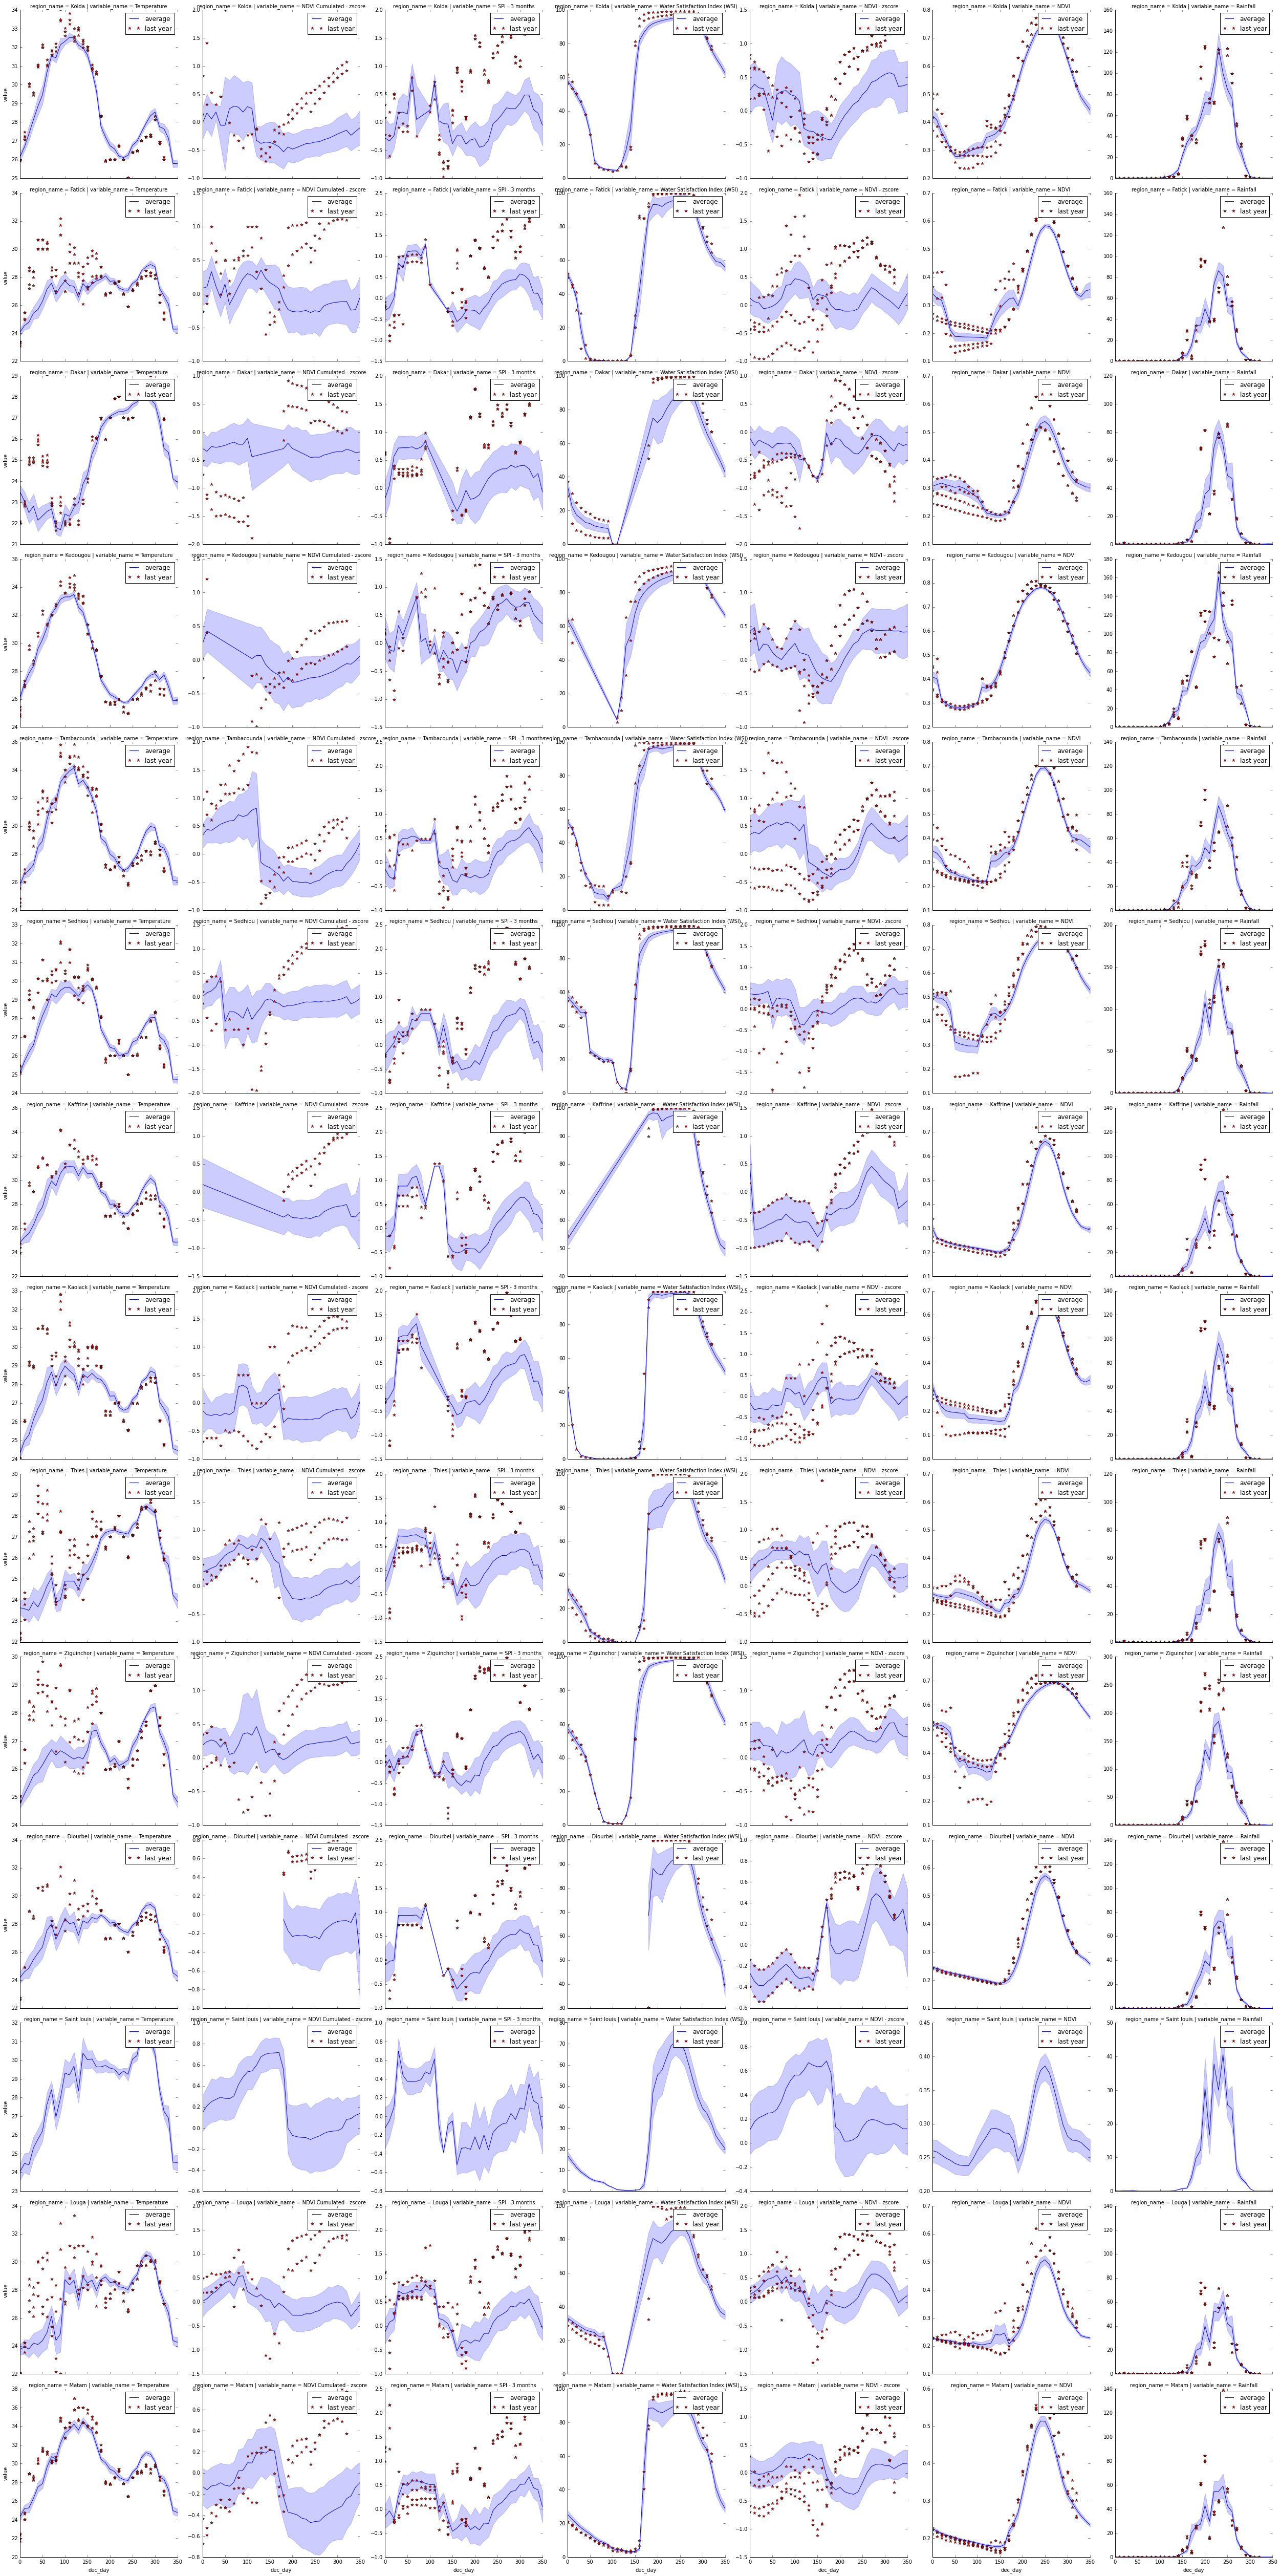

In [6]:

df_temp = df_asap #[(df_asap['unit_name'] == 'Dakar') | (df_asap['unit_name'] == 'Velingara')]
g = sns.FacetGrid(data = df_temp,
                  col = 'variable_name', row = 'region_name',sharey=False,
                  height = 5)
g.map(sns.lineplot, 'dec_day', 'value')
df_curr = df_temp[df_temp['year'] == 2020]
axes = g.axes.flatten()

for ax in axes:
    title = str(ax.title)
    unit = title.split("= ")[1].split()[0]
    var = title.split("= ")[2].split("'")[0]
    ax.plot(df_curr.loc[(df_curr['region_name'] == unit) &
                             (df_curr['variable_name'] == var), 'dec_day'],
                     df_curr.loc[(df_curr['region_name'] == unit) &
                             (df_curr['variable_name'] == var), 'value'], '*', color = 'r')
    ax.legend(['average', 'last year'])

In [ ]:
df_curr

### View data availability

In [10]:
df_asap.columns



Index(['Unnamed: 0', 'region_name', 'variable_name', 'sensor_name',
       'class_name', 'date', 'value', 'year', 'month', 'day', 'yearday',
       'dec_day'],
      dtype='object')

In [11]:
df_temp = df_asap[['region_name', 'variable_name', 'year', 'dec_day', 'value']]

In [12]:
df_temp.head()

,region_name,variable_name,year,dec_day,value
0,Kolda,Temperature,1989,0,25.302
1,Kolda,Temperature,1989,10,26.047
2,Kolda,Temperature,1989,120,31.429
3,Kolda,Temperature,1989,130,32.047
4,Kolda,Temperature,1989,140,32.364


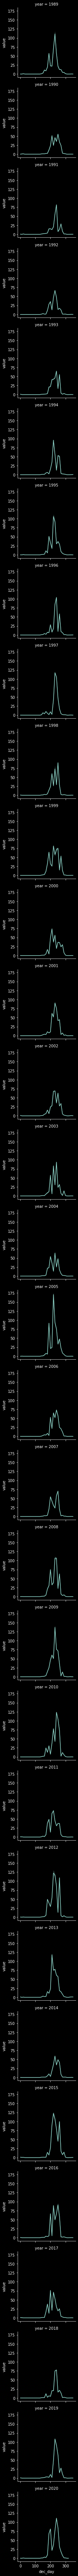

In [18]:
df_temp2 = df_temp[(df_temp['region_name'] == 'Dakar')& (df_temp['variable_name'] == 'Rainfall')]

g = sns.FacetGrid(data = df_temp2[['year', 'dec_day', 'value']], row='year')
g.map(sns.lineplot, 'dec_day', 'value')

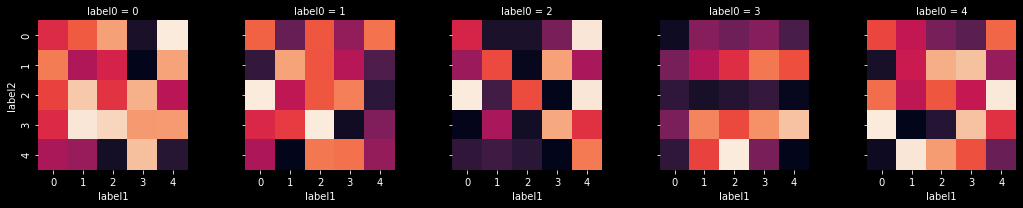

In [22]:

# Generate a set of sample data
np.random.seed(0)
indices = pd.MultiIndex.from_product((range(5), range(5), range(5)),
 names=('label0', 'label1', 'label2'))
data = pd.DataFrame(np.random.uniform(0, 100, size=len(indices)),
 index=indices, columns=('value',)).reset_index()

def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    d = data.pivot(index=args[1], columns=args[0], values=args[2])
    sns.heatmap(d, **kwargs)

fg = sns.FacetGrid(data, col='label0')
fg.map_dataframe(draw_heatmap, 'label1', 'label2', 'value', cbar=False, square = True)
# get figure background color
facecolor=plt.gcf().get_facecolor()